# Bài tập thực hành 1: Dự đoán Hành vi Khách hàng với Naïve Bayes

## Giới thiệu bài toán

**Mục tiêu:** Xây dựng mô hình Naïve Bayes để dự đoán hành vi mua hàng của khách hàng dựa trên thông tin cá nhân.

**Tập dữ liệu:** Customer Behaviour Dataset
- **User ID**: Mã định danh khách hàng
- **Gender**: Giới tính (Male/Female)
- **Age**: Tuổi
- **EstimatedSalary**: Thu nhập ước tính
- **Purchased**: Đã mua hàng hay chưa (0 = Không, 1 = Có)

**Phương pháp:** Sử dụng thuật toán Naïve Bayes để phân loại khách hàng có khả năng mua hàng hay không.

## 1. Import các thư viện cần thiết

In [1]:
# Import thư viện xử lý dữ liệu
import pandas as pd
import numpy as np

# Import thư viện tiền xử lý và mô hình từ scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB

# Import thư viện đánh giá mô hình
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Import thư viện vẽ biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập hiển thị
plt.style.use('ggplot')
sns.set_palette('husl')
%matplotlib inline

print("✅ Đã import tất cả thư viện thành công!")

✅ Đã import tất cả thư viện thành công!


## 2. Đọc và khám phá dữ liệu

In [2]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('data/Customer_Behaviour.csv')

print("📊 Kích thước dữ liệu:", df.shape)
print("\n5 dòng đầu tiên của dữ liệu:")
df.head()

📊 Kích thước dữ liệu: (400, 5)

5 dòng đầu tiên của dữ liệu:


User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [3]:
# Xem thông tin tổng quan về dữ liệu
print("📋 Thông tin chi tiết về dataset:")
df.info()

📋 Thông tin chi tiết về dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
# Thống kê mô tả các biến số
print("📈 Thống kê mô tả:")
df.describe()

📈 Thống kê mô tả:


User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000

In [5]:
# Kiểm tra giá trị thiếu
print("🔍 Kiểm tra giá trị thiếu:")
print(df.isnull().sum())
print("\n✅ Tổng số giá trị thiếu:", df.isnull().sum().sum())

🔍 Kiểm tra giá trị thiếu:
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

✅ Tổng số giá trị thiếu: 0


🎯 Phân phối biến mục tiêu (Purchased):
Purchased
0    257
1    143
Name: count, dtype: int64

Tỷ lệ phần trăm:
Purchased
0    64.25
1    35.75
Name: proportion, dtype: float64


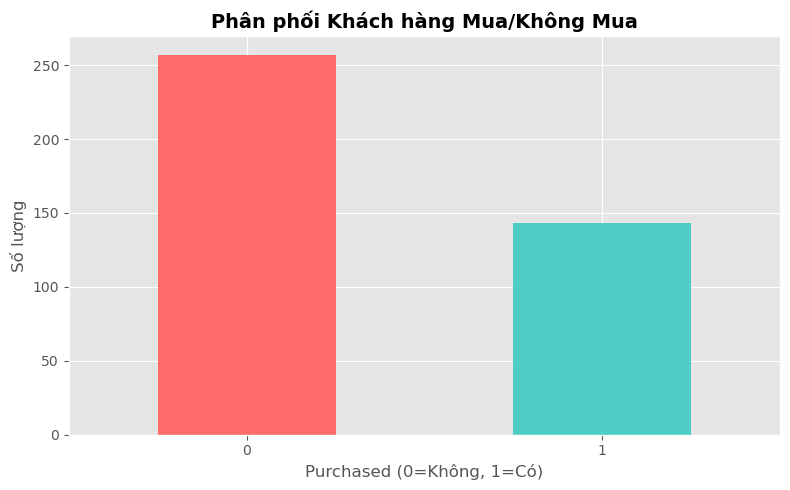

In [6]:
# Kiểm tra phân phối của biến mục tiêu
print("🎯 Phân phối biến mục tiêu (Purchased):")
print(df['Purchased'].value_counts())
print("\nTỷ lệ phần trăm:")
print(df['Purchased'].value_counts(normalize=True) * 100)

# Vẽ biểu đồ phân phối
plt.figure(figsize=(8, 5))
df['Purchased'].value_counts().plot(kind='bar', color=['#FF6B6B', '#4ECDC4'])
plt.title('Phân phối Khách hàng Mua/Không Mua', fontsize=14, fontweight='bold')
plt.xlabel('Purchased (0=Không, 1=Có)', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 3. Tiền xử lý dữ liệu

In [7]:
# Tạo bản sao để xử lý
data = df.copy()

# Loại bỏ cột User ID vì không cần thiết cho việc dự đoán
data = data.drop('User ID', axis=1)

print("✅ Đã loại bỏ cột User ID")
print("\nCác cột còn lại:")
print(data.columns.tolist())

✅ Đã loại bỏ cột User ID

Các cột còn lại:
['Gender', 'Age', 'EstimatedSalary', 'Purchased']


In [8]:
# Mã hóa biến Gender (Male/Female) thành số (0/1)
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

print("✅ Đã mã hóa biến Gender:")
print(f"   Male -> {label_encoder.transform(['Male'])[0]}")
print(f"   Female -> {label_encoder.transform(['Female'])[0]}")

print("\nDữ liệu sau khi mã hóa:")
data.head()

✅ Đã mã hóa biến Gender:
   Male -> 1
   Female -> 0

Dữ liệu sau khi mã hóa:


Gender  Age  EstimatedSalary  Purchased
0       1   19            19000          0
1       1   35            20000          0
2       0   26            43000          0
3       0   27            57000          0
4       1   19            76000          0

In [9]:
# Tách features (X) và target (y)
X = data.drop('Purchased', axis=1)  # Các đặc trưng: Gender, Age, EstimatedSalary
y = data['Purchased']                # Biến mục tiêu: Purchased

print("📊 Kích thước dữ liệu:")
print(f"   X (Features): {X.shape}")
print(f"   y (Target): {y.shape}")

📊 Kích thước dữ liệu:
   X (Features): (400, 3)
   y (Target): (400,)


In [10]:
# Chia dữ liệu thành tập huấn luyện (80%) và tập kiểm thử (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Đã chia dữ liệu:")
print(f"   Tập huấn luyện: {X_train.shape[0]} mẫu ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   Tập kiểm thử: {X_test.shape[0]} mẫu ({X_test.shape[0]/len(X)*100:.1f}%)")

✅ Đã chia dữ liệu:
   Tập huấn luyện: 320 mẫu (80.0%)
   Tập kiểm thử: 80 mẫu (20.0%)


In [11]:
# Chuẩn hóa dữ liệu (Feature Scaling) để các đặc trưng có cùng thang đo
# Điều này giúp mô hình hoạt động tốt hơn
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Đã chuẩn hóa dữ liệu bằng StandardScaler")
print("\nVí dụ 5 mẫu đầu tiên sau khi chuẩn hóa:")
print(X_train_scaled[:5])

✅ Đã chuẩn hóa dữ liệu bằng StandardScaler

Ví dụ 5 mẫu đầu tiên sau khi chuẩn hóa:
[[ 1.08483674 -1.23446186 -0.367992  ]
 [-0.92179769 -0.57764605 -1.05831408]
 [-0.92179769  0.07916976  0.26480323]
 [-0.92179769  1.95578636 -1.3747117 ]
 [-0.92179769  0.36066225 -0.31046516]]


## 4. Xây dựng mô hình Naïve Bayes

In [12]:
# Khởi tạo mô hình Gaussian Naïve Bayes
# GaussianNB phù hợp với dữ liệu có phân phối liên tục (như Age và EstimatedSalary)
model = GaussianNB()

print("🤖 Đã khởi tạo mô hình Gaussian Naïve Bayes")
print(f"\nThông số mô hình: {model.get_params()}")

🤖 Đã khởi tạo mô hình Gaussian Naïve Bayes

Thông số mô hình: {'priors': None, 'var_smoothing': 1e-09}


In [13]:
# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train_scaled, y_train)

print("✅ Đã huấn luyện mô hình thành công!")
print(f"\nSố lượng class: {len(model.classes_)}")
print(f"Classes: {model.classes_}")

✅ Đã huấn luyện mô hình thành công!

Số lượng class: 2
Classes: [0 1]


In [14]:
# Dự đoán trên tập huấn luyện
y_train_pred = model.predict(X_train_scaled)

# Dự đoán trên tập kiểm thử
y_test_pred = model.predict(X_test_scaled)

print("✅ Đã thực hiện dự đoán trên cả 2 tập dữ liệu")
print(f"\nVí dụ 10 dự đoán đầu tiên trên tập test:")
print(f"Giá trị thực tế: {y_test.values[:10]}")
print(f"Giá trị dự đoán: {y_test_pred[:10]}")

✅ Đã thực hiện dự đoán trên cả 2 tập dữ liệu

Ví dụ 10 dự đoán đầu tiên trên tập test:
Giá trị thực tế: [1 0 0 0 0 1 0 1 0 0]
Giá trị dự đoán: [1 0 0 1 0 1 0 1 1 0]


## 5. Đánh giá mô hình

In [15]:
# Tính toán các chỉ số đánh giá trên tập huấn luyện
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Tính toán các chỉ số đánh giá trên tập kiểm thử
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("📊 KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH")
print("=" * 60)
print(f"\n{'Chỉ số':<20} {'Tập huấn luyện':<20} {'Tập kiểm thử':<20}")
print("-" * 60)
print(f"{'Accuracy':<20} {train_accuracy:.4f} ({train_accuracy*100:.2f}%)    {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"{'Precision':<20} {train_precision:.4f} ({train_precision*100:.2f}%)    {test_precision:.4f} ({test_precision*100:.2f}%)")
print(f"{'Recall':<20} {train_recall:.4f} ({train_recall*100:.2f}%)    {test_recall:.4f} ({test_recall*100:.2f}%)")
print(f"{'F1-Score':<20} {train_f1:.4f} ({train_f1*100:.2f}%)    {test_f1:.4f} ({test_f1*100:.2f}%)")
print("=" * 60)

📊 KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH

Chỉ số               Tập huấn luyện       Tập kiểm thử        
------------------------------------------------------------
Accuracy             0.8906 (89.06%)    0.8750 (87.50%)
Precision            0.8692 (86.92%)    0.8519 (85.19%)
Recall               0.8158 (81.58%)    0.7931 (79.31%)
F1-Score             0.8416 (84.16%)    0.8214 (82.14%)


In [16]:
# Hiển thị báo cáo phân loại chi tiết
print("📋 BÁO CÁO PHÂN LOẠI CHI TIẾT (Tập kiểm thử):")
print("=" * 60)
print(classification_report(y_test, y_test_pred, target_names=['Không mua (0)', 'Mua (1)']))

📋 BÁO CÁO PHÂN LOẠI CHI TIẾT (Tập kiểm thử):
               precision    recall  f1-score   support

Không mua (0)       0.89      0.92      0.90        51
      Mua (1)       0.85      0.79      0.82        29

     accuracy                           0.88        80
    macro avg       0.87      0.86      0.86        80
 weighted avg       0.87      0.88      0.87        80



## 6. Vẽ ma trận nhầm lẫn (Confusion Matrix)

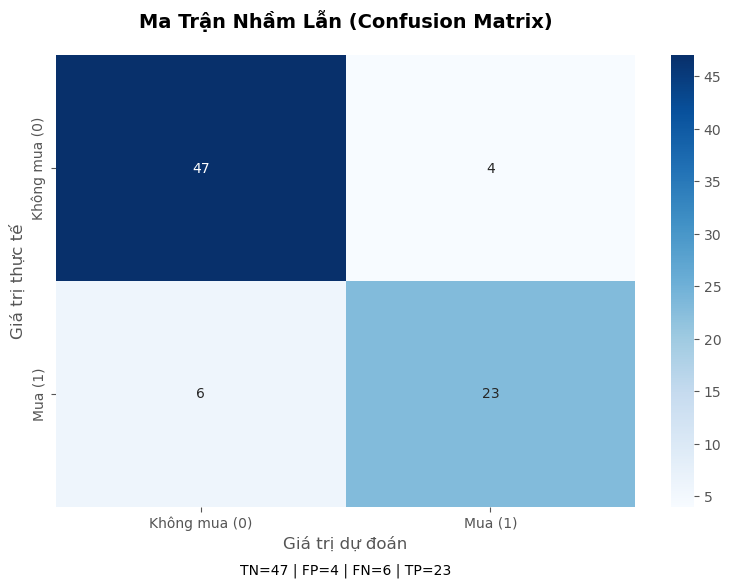


📖 GIẢI THÍCH MA TRẬN NHẦM LẪN:
True Negative (TN):  47 - Dự đoán Không mua, thực tế Không mua ✅
False Positive (FP): 4 - Dự đoán Mua, thực tế Không mua ❌
False Negative (FN): 6 - Dự đoán Không mua, thực tế Mua ❌
True Positive (TP):  23 - Dự đoán Mua, thực tế Mua ✅


In [17]:
# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_test_pred)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Không mua (0)', 'Mua (1)'],
            yticklabels=['Không mua (0)', 'Mua (1)'])
plt.title('Ma Trận Nhầm Lẫn (Confusion Matrix)', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Giá trị thực tế', fontsize=12)
plt.xlabel('Giá trị dự đoán', fontsize=12)

# Thêm chú thích
plt.text(0.5, -0.15, f'TN={cm[0,0]} | FP={cm[0,1]} | FN={cm[1,0]} | TP={cm[1,1]}', 
         ha='center', transform=plt.gca().transAxes, fontsize=10)

plt.tight_layout()
plt.show()

# Giải thích ma trận
print("\n📖 GIẢI THÍCH MA TRẬN NHẦM LẪN:")
print("=" * 60)
print(f"True Negative (TN):  {cm[0,0]} - Dự đoán Không mua, thực tế Không mua ✅")
print(f"False Positive (FP): {cm[0,1]} - Dự đoán Mua, thực tế Không mua ❌")
print(f"False Negative (FN): {cm[1,0]} - Dự đoán Không mua, thực tế Mua ❌")
print(f"True Positive (TP):  {cm[1,1]} - Dự đoán Mua, thực tế Mua ✅")
print("=" * 60)

## 7. Biểu đồ so sánh hiệu suất mô hình

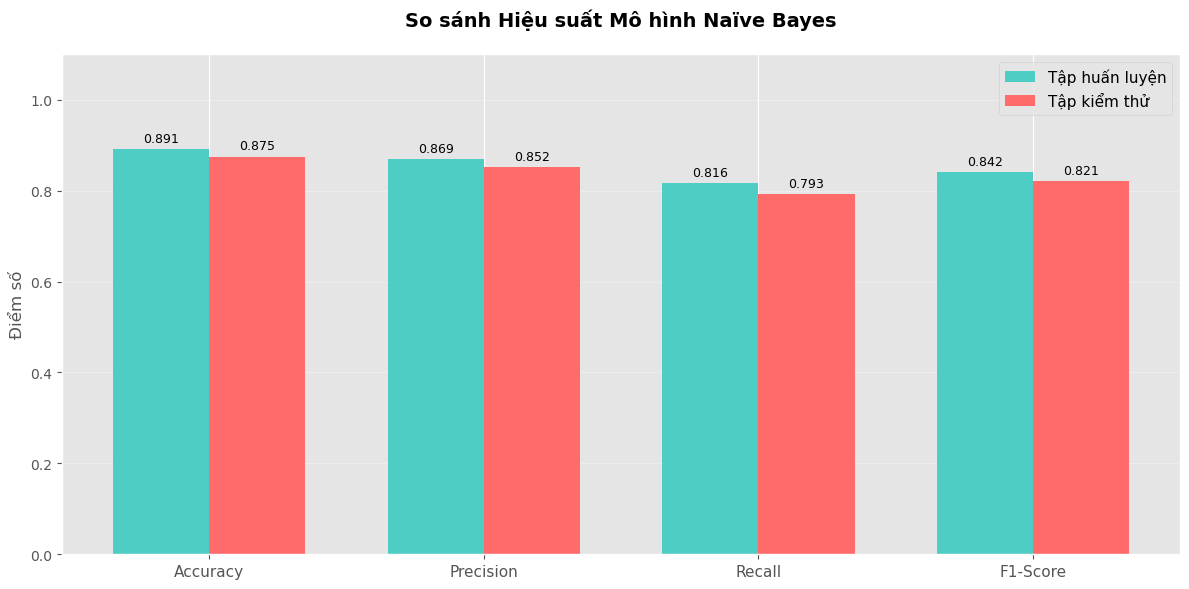

In [18]:
# Chuẩn bị dữ liệu cho biểu đồ
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
train_scores = [train_accuracy, train_precision, train_recall, train_f1]
test_scores = [test_accuracy, test_precision, test_recall, test_f1]

# Vẽ biểu đồ cột so sánh
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, train_scores, width, label='Tập huấn luyện', color='#4ECDC4')
bars2 = ax.bar(x + width/2, test_scores, width, label='Tập kiểm thử', color='#FF6B6B')

# Thêm nhãn và tiêu đề
ax.set_ylabel('Điểm số', fontsize=12)
ax.set_title('So sánh Hiệu suất Mô hình Naïve Bayes', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11)
ax.legend(fontsize=11)
ax.set_ylim([0, 1.1])
ax.grid(axis='y', alpha=0.3)

# Thêm giá trị lên đầu mỗi cột
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(bars1)
autolabel(bars2)

plt.tight_layout()
plt.show()

## 8. Kiểm tra dự đoán với một vài mẫu cụ thể

In [19]:
# Lấy 10 mẫu ngẫu nhiên từ tập test để kiểm tra
sample_indices = np.random.choice(X_test.index, size=10, replace=False)
X_sample = X_test.loc[sample_indices]
y_sample_true = y_test.loc[sample_indices]

# Chuẩn hóa và dự đoán
X_sample_scaled = scaler.transform(X_sample)
y_sample_pred = model.predict(X_sample_scaled)
y_sample_proba = model.predict_proba(X_sample_scaled)

# Hiển thị kết quả
print("🔍 DỰ ĐOÁN TRÊN MỘT SỐ MẪU CỤ THỂ")
print("=" * 100)

results_df = pd.DataFrame({
    'Gender': ['Male' if g == 1 else 'Female' for g in X_sample['Gender']],
    'Age': X_sample['Age'].values,
    'Salary': X_sample['EstimatedSalary'].values,
    'Thực tế': ['Mua' if y == 1 else 'Không' for y in y_sample_true],
    'Dự đoán': ['Mua' if y == 1 else 'Không' for y in y_sample_pred],
    'Xác suất (Mua)': [f'{p[1]:.2%}' for p in y_sample_proba],
    'Kết quả': ['✅' if y_sample_true.iloc[i] == y_sample_pred[i] else '❌' 
                for i in range(len(y_sample_pred))]
})

print(results_df.to_string(index=False))
print("=" * 100)

🔍 DỰ ĐOÁN TRÊN MỘT SỐ MẪU CỤ THỂ
Gender  Age  Salary Thực tế Dự đoán Xác suất (Mua) Kết quả
Female   50   36000     Mua     Mua         69.19%       ✅
  Male   37   53000   Không   Không         12.20%       ✅
Female   58   38000     Mua     Mua         93.45%       ✅
  Male   41   59000   Không   Không         24.45%       ✅
  Male   36   33000   Không   Không         10.56%       ✅
  Male   60  102000     Mua     Mua         99.17%       ✅
  Male   34   43000   Không   Không          7.15%       ✅
  Male   47   25000     Mua     Mua         54.50%       ✅
  Male   35   50000   Không   Không          8.58%       ✅
Female   35   60000   Không   Không         10.75%       ✅


## 9. Kết luận

### Tóm tắt kết quả:

Mô hình **Gaussian Naïve Bayes** đã được xây dựng thành công để dự đoán hành vi mua hàng của khách hàng.

### Đánh giá hiệu suất:

- **Accuracy (Độ chính xác)**: Cho biết tỷ lệ dự đoán đúng trên tổng số mẫu
- **Precision (Độ chính xác dương)**: Trong số khách hàng được dự đoán sẽ mua, bao nhiêu % thực sự mua
- **Recall (Độ nhạy)**: Trong số khách hàng thực sự mua, mô hình phát hiện được bao nhiêu %
- **F1-Score**: Trung bình điều hòa của Precision và Recall

### Ưu điểm của mô hình:

1. ✅ **Đơn giản và nhanh**: Thuật toán Naïve Bayes rất nhanh trong cả quá trình huấn luyện và dự đoán
2. ✅ **Dễ hiểu**: Dựa trên định lý Bayes, dễ giải thích
3. ✅ **Hiệu quả với dữ liệu nhỏ**: Hoạt động tốt ngay cả khi có ít dữ liệu huấn luyện
4. ✅ **Cung cấp xác suất**: Cho phép đánh giá độ tin cậy của dự đoán

### Hạn chế:

1. ⚠️ **Giả định độc lập**: Giả định các đặc trưng độc lập với nhau (trong thực tế không hoàn toàn đúng)
2. ⚠️ **Nhạy cảm với dữ liệu không cân bằng**: Nếu tỷ lệ giữa các lớp chênh lệch quá lớn

### Ứng dụng thực tế:

- 🎯 **Marketing**: Xác định khách hàng tiềm năng để tối ưu hóa chiến dịch quảng cáo
- 💰 **Tăng doanh thu**: Tập trung nguồn lực vào những khách hàng có khả năng mua cao
- 📊 **Phân khúc khách hàng**: Hiểu rõ hơn về hành vi và đặc điểm của từng nhóm khách hàng

### Hướng cải thiện:

- 🔄 Thử nghiệm với các biến thể khác của Naïve Bayes (MultinomialNB, BernoulliNB)
- 📈 Thu thập thêm dữ liệu và đặc trưng mới (lịch sử mua hàng, sở thích, v.v.)
- 🎛️ So sánh với các thuật toán khác (Random Forest, SVM, Neural Networks)
- ⚖️ Cân bằng dữ liệu nếu cần thiết (SMOTE, undersampling, v.v.)